## Import Dataset

In [5]:
from teaspoon.ML import load_datasets
import numpy as np
import pandas as pd
mnist = load_datasets.mnist()
mnist

,zero_dim_rtl,zero_dim_ltr,zero_dim_btt,zero_dim_ttb,one_dim_rtl,one_dim_ltr,one_dim_btt,one_dim_ttb,labels
0,"[[23.0, 50.0], [13.0, 20.0]]","[[24.0, 50.0], [11.0, 21.0]]","[[24.0, 50.0], [8.0, 9.0]]","[[23.0, 50.0]]",[],[],[],[],5
1,"[[22.0, 50.0]]","[[22.0, 50.0]]","[[23.0, 50.0]]","[[24.0, 50.0]]","[[0.0, 8.0]]","[[0.0, 8.0]]","[[0.0, 9.0]]","[[0.0, 8.0]]",0
2,"[[22.0, 50.0]]","[[25.0, 50.0]]","[[24.0, 50.0], [15.0, 16.0]]","[[23.0, 50.0], [13.0, 22.0]]",[],[],[],[],4
3,"[[21.0, 50.0]]","[[20.0, 50.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]",[],[],[],[],1
4,"[[20.0, 50.0], [16.0, 18.0]]","[[22.0, 50.0], [14.0, 15.0]]","[[26.0, 50.0]]","[[21.0, 50.0]]","[[0.0, 9.0]]","[[0.0, 12.0]]","[[0.0, 9.0]]","[[0.0, 14.0]]",9
...,...,...,...,...,...,...,...,...,...
59995,"[[23.0, 50.0], [16.0, 17.0]]","[[22.0, 50.0], [16.0, 18.0]]","[[24.0, 50.0]]","[[23.0, 50.0]]","[[0.0, 13.0], [0.0, 7.0]]","[[0.0, 13.0], [0.0, 9.0]]","[[0.0, 16.0], [0.0, 6.0]]","[[0.0, 17.0], [0.0, 5.0]]",8
59996,"[[21.0, 50.0], [17.0, 18.0]]","[[24.0, 50.0], [12.0, 18.0], [9.0, 17.0]]","[[23.0, 50.0]]","[[24.0, 50.0], [7.0, 10.0]]",[],[],[],[],3
59997,"[[24.0, 50.0], [13.0, 18.0]]","[[23.0, 50.0], [12.0, 20.0]]","[[24.0, 50.0]]","[[23.0, 50.0], [5.0, 7.0]]",[],[],[],[],5
59998,"[[23.0, 50.0], [8.0, 21.0]]","[[22.0, 50.0], [11.0, 15.0]]","[[21.0, 50.0]]","[[26.0, 50.0], [8.0, 15.0]]","[[0.0, 17.0]]","[[0.0, 8.0]]","[[0.0, 15.0]]","[[0.0, 10.0]]",6


### Fill Missing Data in One Dimension

In [2]:
def fill_missing(dim_1):
    for i in range(0, len(dim_1)):
        if len(dim_1[i])== 0:
            dim_1[i] = np.array([[0,.01]])
        else: 
            dim_1[i] = dim_1[i]
    return dim_1

In [3]:
import warnings
warnings.filterwarnings('ignore')
mnist['one_dim_rtl'] = fill_missing(mnist['one_dim_rtl'])
mnist['one_dim_ltr'] = fill_missing(mnist['one_dim_ltr'])
mnist['one_dim_btt'] = fill_missing(mnist['one_dim_btt'])
mnist['one_dim_ttb'] = fill_missing(mnist['one_dim_ttb'])

### Choose Dimension for Timing Test

In [6]:
def train_test_split_sklearn(DgmsFD, labels_col, train_size=.5, seed=12):
    from sklearn.model_selection import train_test_split
    labels = DgmsFD[labels_col]
    training_dgms, testing_dgms = train_test_split(DgmsFD, train_size=train_size, random_state=seed, stratify=labels)
    return training_dgms.reset_index(), testing_dgms.reset_index()

In [5]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = .95)
xdgm0_train = dgms_train['zero_dim_rtl']
xdgm0_test = dgms_test['zero_dim_rtl']
xdgm1_train = dgms_train['one_dim_rtl']
xdgm1_test = dgms_test['one_dim_rtl']
labels_train = dgms_train['labels']
labels_test = dgms_test['labels']

### Load original kernel method function from teaspoon

In [68]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi

def KernelMethod(perDgm1, perDgm2, sigma):
    
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(math.pow(dist1, 2))/(8*sigma)) - \
                np.exp(-(math.pow(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

def heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(KernelMethod(dgm0, dgm0, sigma) + KernelMethod(dgm1, dgm1, sigma) - 2*KernelMethod(dgm0, dgm1, sigma))

def kernel_features(train, s):
    import time
    import numpy as np
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))

    for i in range(0,n_train):
        for j in range(0,i):
            dgm0 = train[i]
            dgm1 = train[j]
            hka = heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

Optimized with Numba

In [60]:
import numpy as np
import math
from numpy.linalg import norm as lnorm
from math import pi
from numba import jit
import time

@jit(nopython=True, parallel=True)
def optimizedKernelMethod(perDgm1, perDgm2, sigma):
    L1 = len(perDgm1)
    L2 = len(perDgm2)
    kernel = np.zeros((L2, L1))

    Kernel = 0

    for i in range(0, L1):
        p = perDgm1[i]
        p = np.reshape(p, (2, 1))
        for j in range(0, L2):
            q = perDgm2[j]
            q = np.reshape(q, (2, 1))
            q_bar = np.zeros((2, 1))
            q_bar[0] = q[1]
            q_bar[1] = q[0]
            dist1 = lnorm(p-q)
            dist2 = lnorm(p-q_bar)
            kernel[j, i] = np.exp(-(np.power(dist1, 2))/(8*sigma)) - \
                np.exp(-(np.power(dist2, 2))/(8*sigma))
            Kernel = Kernel+kernel[j, i]
    Kernel = Kernel*(1/(8*pi*sigma))

    return Kernel

@jit(nopython=True)
def optimized_heat_kernel_distance(dgm0, dgm1, sigma=.4):
    return np.sqrt(optimizedKernelMethod(dgm0, dgm0, sigma) + optimizedKernelMethod(dgm1, dgm1, sigma) - 2*optimizedKernelMethod(dgm0, dgm1, sigma))

@jit
def optimized_kernel_features(train, s):
    n_train = len(train)
    X_train_features = np.zeros((n_train, n_train))
    
    for i in range(0,n_train):
        for j in range(0,i):
            dgm0 = train[i]
            dgm1 = train[j]
            hka = optimized_heat_kernel_distance(dgm0, dgm1, sigma = s) 
            X_train_features[i,j] = hka
            X_train_features[j,i] = hka

    return X_train_features

/var/folders/p6/pn26dbmx4jj67d6nh7m6557h0000gn/T/ipykernel_42875/1583188434.py:39: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def optimized_kernel_features(train, s):


In [62]:
optimizedKernelMethod(train_test[0], train_test[1], .3)
optimized_heat_kernel_distance(train_test[0], train_test[1], sigma=.3)
optimized_kernel_features(train_test, .3)
optimizedKernelMethod.parallel_diagnostics(level=4)

 
 Parallel Accelerator Optimizing:  Function optimizedKernelMethod, 
/var/folders/p6/pn26dbmx4jj67d6nh7m6557h0000gn/T/ipykernel_42875/1583188434.py 
(8)  


Parallel loop listing for  Function optimizedKernelMethod, /var/folders/p6/pn26dbmx4jj67d6nh7m6557h0000gn/T/ipykernel_42875/1583188434.py (8) 
--------------------------------------------------------------------------|loop #ID
@jit(nopython=True, parallel=True)                                        | 
def optimizedKernelMethod(perDgm1, perDgm2, sigma):                       | 
    L1 = len(perDgm1)                                                     | 
    L2 = len(perDgm2)                                                     | 
    kernel = np.zeros((L2, L1))-------------------------------------------| #4
                                                                          | 
    Kernel = 0                                                            | 
                                                                          

Parallel with jit

In [63]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 10, seed=1)
train_test = np.array(dgms_train['zero_dim_rtl'])
X_train_features = optimized_kernel_features(train_test, s = .3)

In [64]:
from numba import jit
@jit(nopython=True)
def parallel_kernel_features_train(train, s):
    n_train = len(dummy)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [65]:
from numba import guvectorize
@guvectorize(["void(float64[:,:], float64[:], float64, float64[:,:])",],"(m,n),(p),()->(p,p)", target='cpu')
def gu_kernel_features_train(train, dummy, s, result):
    n_train = len(dummy)
    for i in range(n_train):
        for j in range(i):
            dgm0 = train[train[:,0]==i,1:3]
            dgm1 = train[train[:,0]==j,1:3]
            kSigma0 = 0
            kSigma1 = 0
            kSigma2 = 0
            sigma = s
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm0.shape[0]):
                    q = dgm0[l,0:2]
                    qc = dgm0[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma0 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm1.shape[0]):
                p = dgm1[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma1 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))
            for k in range(dgm0.shape[0]):
                p = dgm0[k,0:2]
                for l in range(dgm1.shape[0]):
                    q = dgm1[l,0:2]
                    qc = dgm1[l, 1::-1]
                    pq = (p[0] - q[0])**2 + (p[1] - q[1])**2
                    pqc = (p[0] - qc[0])**2 + (p[1] - qc[1])**2
                    kSigma2 += math.exp(-( pq) / (8 * sigma)) - math.exp(-(pqc) / (8 * sigma))

            kSigma0 = kSigma0/(8 * np.pi * sigma)
            kSigma1 = kSigma1/(8 * np.pi * sigma)
            kSigma2 = kSigma2/(8 * np.pi * sigma)
            result[i,j] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)
            result[j,i] = math.sqrt(kSigma1 + kSigma0-2*kSigma2)

In [66]:
def reshape_persistence_diagrams(dgm):
    dgm_reshape = np.array([])
    n = len(dgm)
    for i in range(0,n):
        t = np.repeat(i, len(dgm[i]))
        t = t.reshape(len(dgm[i]),1)
        t1 = np.concatenate((t,dgm[i]),1)
        if i == 0:
            dgm_reshape = t1
        else:
            dgm_reshape = np.append(dgm_reshape, t1, 0)
    return dgm_reshape

First run to compile

In [69]:
dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = 10, seed=1)
train_test = np.array(dgms_train['zero_dim_rtl'])
X_train_features = kernel_features(np.array(train_test), s = .3)
X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
dummy_train = np.arange(len(train_test), dtype=np.float64)
train = reshape_persistence_diagrams(train_test)
result = parallel_kernel_features_train(train, dummy_train, .3)
#X_train_features = par_optimized_kernel_features(np.array(train_test), s = .3)

### Loop for random samples and timing

In [25]:
seed = [0,1,2,3,4]
train_size = [.001, .005, .01, .05, .1]
n = len(train_size)
timing = np.zeros((n,3))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        dummy_train = np.arange(len(xdgm0_train), dtype=np.float64)
        train = reshape_persistence_diagrams(xdgm0_train)
        timing[i,0] += len(xdgm0_train)

        start = time.time()
        result1 = gu_kernel_features_train(train, dummy_train, .3)
        end = time.time()-start
        timing[i,1] +=end

        start = time.time()
        X_train_features = optimized_kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,2] +=end

    print("Finished Training ", i)
timing = pd.DataFrame(timing/5)
timing.columns=['Observations', 'guvectorize', 'jit optimized']
print(timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3


Plot Timing

<Axes: xlabel='Observations'>

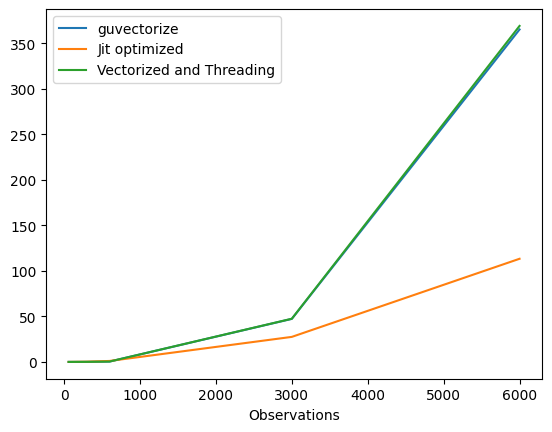

In [23]:
timing.columns=['Observations', 'guvectorize', 'jit optimized', 'Vectorized and Threading']
timing.plot(x='Observations')

In [70]:
seed = [0,1,2,3,4,5,6,7,8,9]
train_size = [.001, .005, .01, .05]
n = len(train_size)
timing = np.zeros((n,4))
for i in range(0,n):
    for j in seed:
        dgms_train, dgms_test = train_test_split_sklearn(mnist, 'labels', train_size = train_size[i], seed=j)
        xdgm0_train = np.array(dgms_train['zero_dim_rtl'])
        timing[i,0] += len(xdgm0_train)
        start = time.time()
        X_train_features1 = kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,1] +=end
        start = time.time()
        X_train_features = optimized_kernel_features(xdgm0_train, s = .3)
        end = time.time()-start
        timing[i,2] +=end
        dummy_train = np.arange(len(xdgm0_train), dtype=np.float64)
        train = reshape_persistence_diagrams(xdgm0_train)
        start = time.time()
        result3 = parallel_kernel_features_train(train, dummy_train, .3)
        end = time.time()-start
        timing[i,3] +=end
    print("Finished Training ", i)
timing = pd.DataFrame(timing/10)
timing.columns=['Observations', 'Original', 'Jit optimized', 'Vectorized and Threading']
print(timing)

Finished Training  0
Finished Training  1
Finished Training  2
Finished Training  3
   Observations    Original  Jit optimized  Vectorized and Threading
0          60.0    0.114951       2.448380                  0.001022
1         300.0    2.752399      58.231782                  0.065892
2         600.0   10.942251     228.400587                  0.430869
3        3000.0  271.485491    5669.453464                 46.637876


<Axes: xlabel='Observations'>

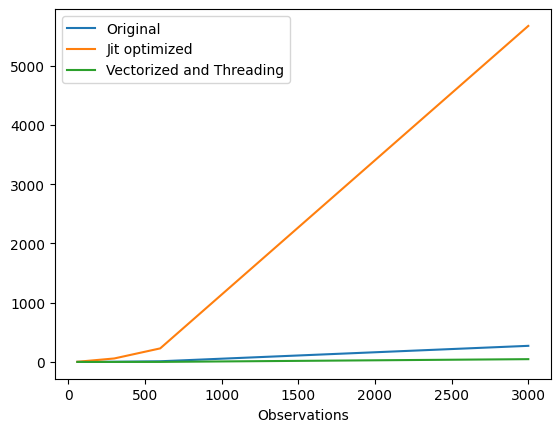

In [71]:
timing.plot(x='Observations')

In [ ]:
train_test = xdgm0_train[0:200]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
dummy_train = np.arange(len(train_test), dtype=np.float64)
train = reshape_persistence_diagrams(train_test)
%timeit numba_kernel_features_train(train, dummy_train, .3)

In [ ]:
train_test = xdgm0_train[0:300]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:400]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:750]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1250]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:1500]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)

In [ ]:
train_test = xdgm0_train[0:2000]
%timeit timing, X_train_features = kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = optimized_kernel_features(np.array(train_test), s = .3)
%timeit timing, X_train_features = parallel_optimized_kernel_features(np.array(train_test), s = .3)